# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject-matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholesterol in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiograph results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during exercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with exercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thallium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defected but ok now
    * 7: reversible defect: no proper blood movement when exercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

## Load data 

In [3]:
# load the data
df = pd.read_csv('heart-disease.csv')
# then look at head of dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# see the shape of our dataframe
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [5]:
# show value_counts target
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

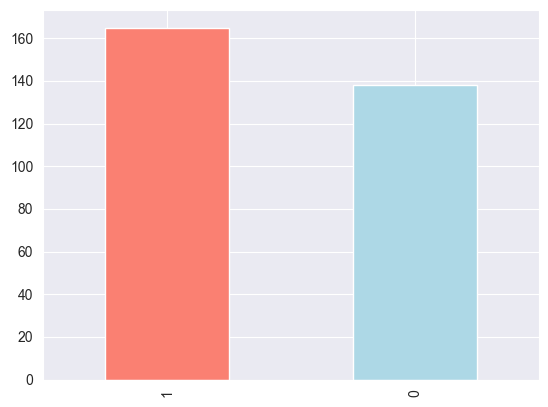

In [6]:
# use a plot to make value_counts visualize
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [7]:
# information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# describe the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex 

In [10]:
# the counts of males and females
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# compare target column with sex column
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

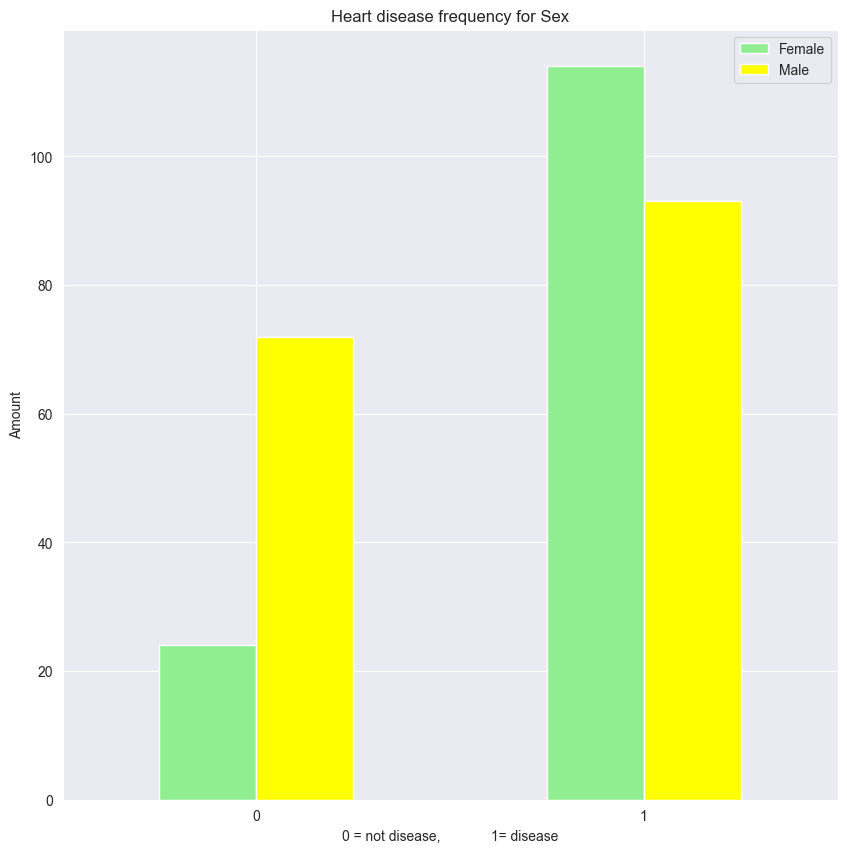

In [12]:
# create a plot of crosstab
pd.crosstab(df['sex'], df['target']).plot(kind='bar', figsize=(10, 10), 
                                         color=['lightgreen', 'yellow'])
# add title and xlabel and ylabel
plt.title('Heart disease frequency for Sex')
plt.xlabel('0 = not disease,             1= disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

### Age vs. Max Heart Rate for Heart Disease

In [13]:
# value_counts thalach
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

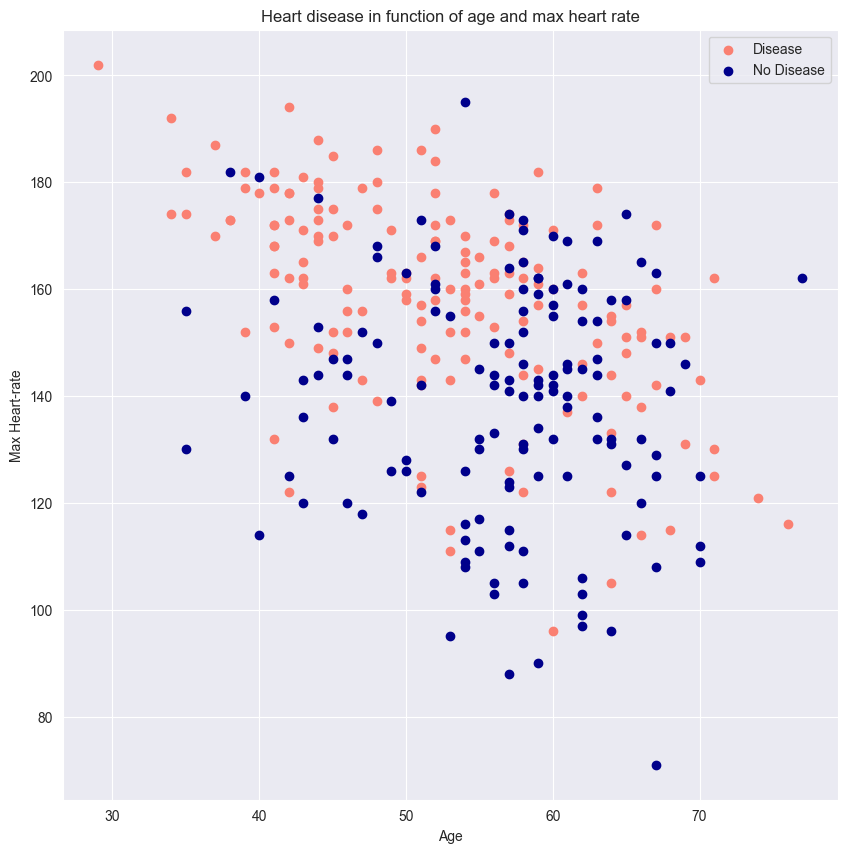

In [14]:
# create another figure
plt.figure(figsize=(10, 10))

# scatter with positive examples
plt.scatter(df['age'][ df['target'] == 1 ], df['thalach'][ df['target'] == 1 ], c='salmon')

# scatter with negative examples
plt.scatter(df['age'][df['target'] == 0], df['thalach'][df['target'] == 0], c='darkblue')

# add some helpful info
plt.title('Heart disease in function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart-rate')
plt.legend(['Disease', 'No Disease'])


<Axes: ylabel='Frequency'>

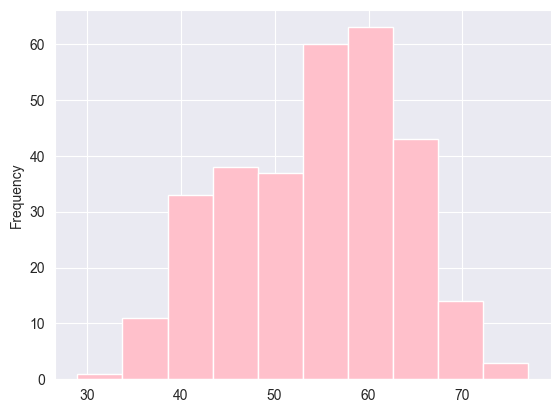

In [15]:
# check the distribution of the age column
df['age'].plot.hist(color='pink')

## Heart Disease Frequency per Chest Pain Type
cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [16]:
# see with crosstab
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


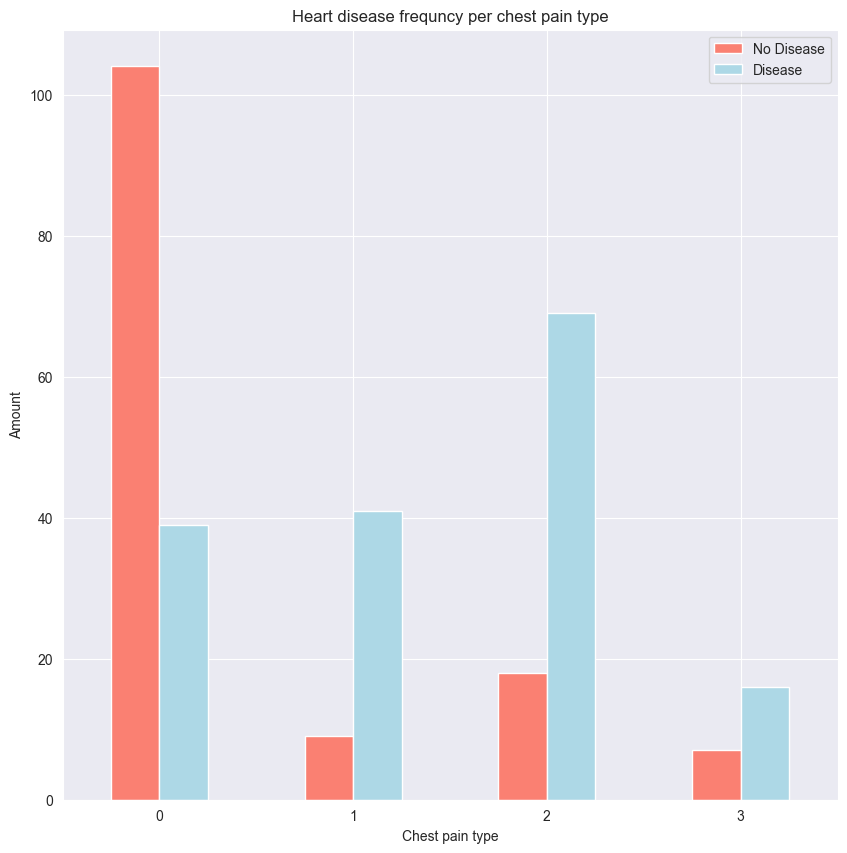

In [17]:
# make the crosstab more visual 
pd.crosstab(df['cp'], df['target']).plot(kind='bar',figsize=(10, 10) 
                                        ,color=['salmon', 'lightblue'])
# add some info 
plt.title('Heart disease frequncy per chest pain type')
plt.xlabel('Chest pain type')
plt.xticks(rotation=0)
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease']);

In [18]:
# create a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


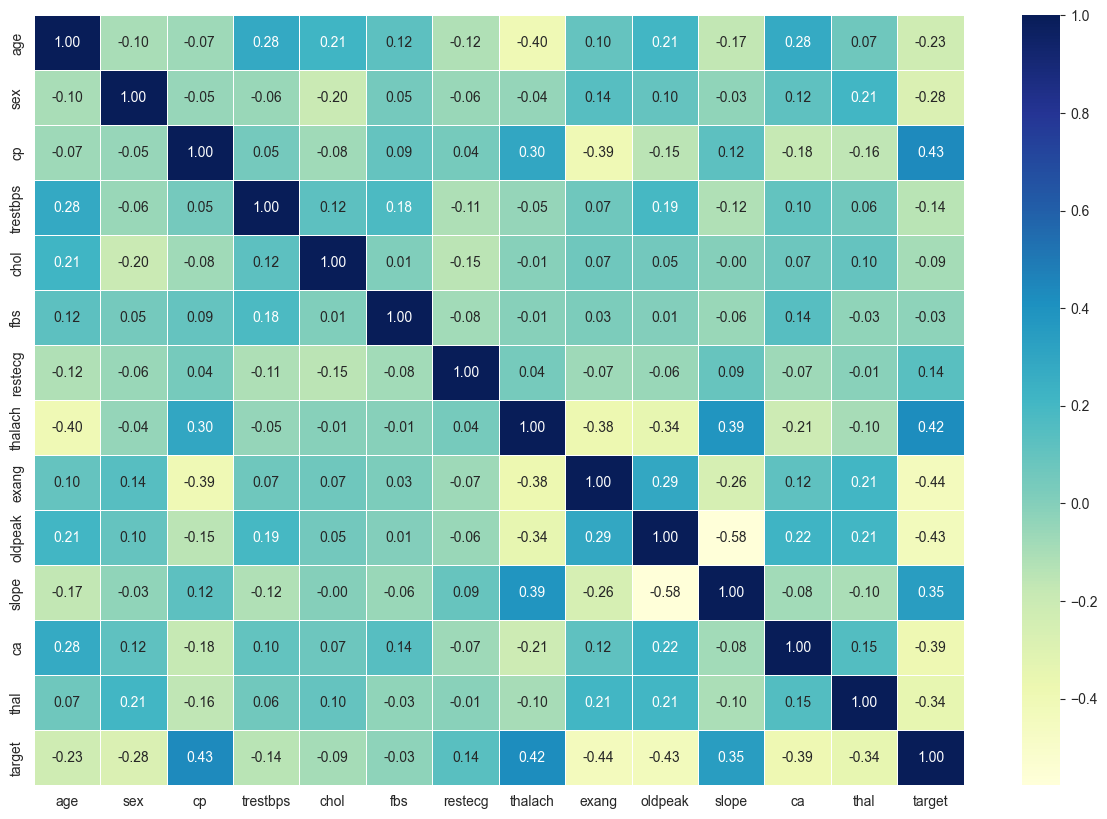

In [19]:
# make our correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sb.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu');

## 5. Modelling

In [20]:
# see the data again
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# split the data to x, y
x = df.drop('target', axis=1)
y = df['target']
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
# setup random seed
np.random.seed(42)
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [23]:
# put models into a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'K-Nearest Nighbours': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}
# create a function to fit the data and score models
def fit_and_score(models, x_train, y_train, x_test, y_test):
    """
    Fits and evaluate our machine learning models    : a dict of machine learning models
    """
    # set random seed 
    np.random.seed(42)
    
    # make a dictionary to save the scores of our models
    scores = {}
    
    # loop through the models
    for model_name, model in models.items():
        # fit the data
        model.fit(x_train, y_train)
        # evaluate the score of the model and append it to score dict
        scores[model_name] = model.score(x_test, y_test)
    return scores

In [24]:
model_scores = fit_and_score(models, x_train, y_train, x_test, y_test)
model_scores

/home/mohammadali/learning/coding/git_projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Nighbours': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### model comparison

(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'K-Nearest Nighbours'),
  Text(2, 0, 'Random Forest')])

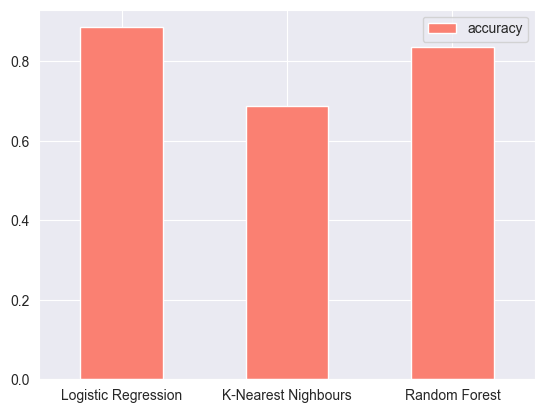

In [25]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(color=['salmon'])
plt.xticks(rotation=0)

Now we've got a baseline model... and we know a model's first predictions aren't always what we should base our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [26]:
# Tune the KNN model
train_scores = []
test_scores = []
# create a list of values for n neighbours
neighbours = range(1, 21)
# create an instance 
knn = KNeighborsClassifier()

# loop throgh different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)
    # fit the data 
    knn.fit(x_train, y_train)
    # evaluate the score of model train
    train_scores.append(knn.score(x_train, y_train))
    # evaluate the score of model test
    test_scores.append(knn.score(x_test, y_test))
    

In [27]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [28]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

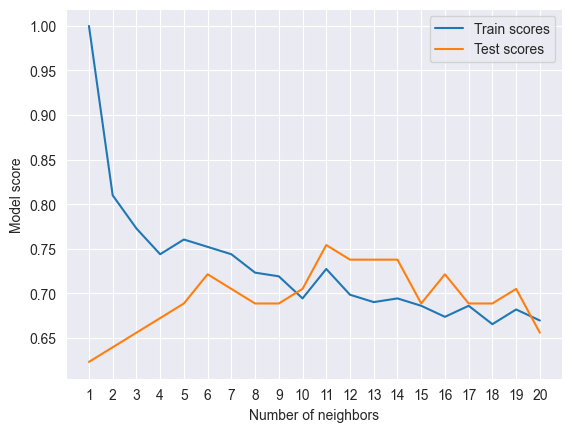

In [29]:
# make the scores visualize 
plt.plot(neighbours, train_scores, label='Train scores')
plt.plot(neighbours, test_scores, label='Test scores')
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
plt.xticks(np.arange(1, 21, 1));

### Hyperparameter tunning by RandomizedSearchCV
We are going to tune using RandomizedSearchCV:
* LogestRegression
* RandomForestClassifier

In [30]:
# create hyperparameter grid for LogesticRegression
logestic_regression_grid = {'C': np.logspace(-4, 4, 20),
                           'solver': ['liblinear']}
# create hyperparameter gird for RandomForestClassifier
random_forest_grid = {'n_estimators': np.arange(10, 1000, 50),
                     'max_depth': [None, 3, 5, 10],
                     'min_samples_split': np.arange(2, 20, 2),
                     'min_samples_leaf': np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [31]:
# tune LogesticRegression

# set up a random seed
np.random.seed(42)
# use RandomizedSearchCV
rs_logestic_regression = RandomizedSearchCV(estimator=LogisticRegression(),
                              param_distributions=logestic_regression_grid,
                              cv=5, n_iter=20, verbose=True)
# fit data into rs_logestic_regression
rs_logestic_regression.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
# see the best params
rs_logestic_regression.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
# see the score of the model
rs_logestic_regression.score(x_test, y_test)

0.8852459016393442

In [34]:
# tune the RandomForestClassifier

# set up the random seed
np.random.seed(42)

# use RandomizedSearchCV
rs_random_forest = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                    param_distributions=random_forest_grid,
                                     cv=5, n_iter=20, verbose=True)
# fit the data to the model
rs_random_forest.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
# see the best params 
rs_random_forest.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
rs_random_forest.score(x_test, y_test)

0.8688524590163934

### Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [37]:
# different hyperparameter for out LogesticRegression model
logestic_regression_grid = {'C': np.logspace(-4, 4, 80),
                           'solver': ['liblinear']}
gs_logestic_regression = GridSearchCV(estimator=LogisticRegression(), 
                                      param_grid=logestic_regression_grid,
                                      cv=5, verbose=True)
# fit the data to the model
gs_logestic_regression.fit(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.26260011e-04, 1.59415904e-04, 2.01278538e-04,
       2.54134304e-04, 3.20870000e-04, 4.05130497e-04, 5.11517810e-04,
       6.45842443e-04, 8.15440740e-04, 1.02957557e-03, 1.29994222e-03,
       1.64130720e-03, 2.07231465e-03, 2.61650470e-03, 3.30359912e-03,
       4.17112461e-03, 5.26646239e-03, 6.649436...
       4.68690419e+01, 5.91768575e+01, 7.47167068e+01, 9.43373222e+01,
       1.19110313e+02, 1.50388695e+02, 1.89880782e+02, 2.39743497e+02,
       3.02700165e+02, 3.82189262e+02, 4.82552204e+02, 6.09270466e+02,
       7.69264957e+02, 9.71274020e+02, 1.22633068e+03, 1.54836526e+03,
       1.95496614e+03, 2.46834047e+03, 3.11652694e+03, 3.93492726e+03,
       4.96823959e+03, 6.27289986e+03, 7.92016405e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
# check the best params
gs_logestic_regression.best_params_

{'C': 0.2196707090793235, 'solver': 'liblinear'}

In [39]:
# see the score of tunned model
gs_logestic_regression.score(x_test, y_test)

0.8852459016393442

### Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.


In [40]:
# make some predictions
y_preds = gs_logestic_regression.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [41]:
# plot roc_curve and calculate the AUC
# plot_roc_curve(gs_logestic_regression, x_test, y_test, color='red');

In [42]:
# confusion matrix and plot it
conf_matrix_score = confusion_matrix(y_test, y_preds)
# plot_confusion_matrix(gs_logestic_regression, x_test, y_test, values_format='d', );

In [43]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

In [44]:
# check the best params
gs_logestic_regression.best_params_

{'C': 0.2196707090793235, 'solver': 'liblinear'}

In [45]:
# create new model
clf = LogisticRegression(C=0.2196707090793235, solver='liblinear')

In [46]:
#cross-validation accuracy 
accurcy_cv = cross_val_score(clf, x, y, scoring='accuracy', cv=5)
accurcy_cv = np.mean(accurcy_cv)
accurcy_cv

0.8479781420765027

In [47]:
# cross-validation recall
recall_cv = cross_val_score(clf, x, y, scoring='recall', cv=5)
recall_cv = np.mean(recall_cv)
recall_cv

0.9272727272727274

In [48]:
# cross-validation precision
precision_cv = cross_val_score(clf, x, y, scoring='precision', cv=5)
precision_cv = np.mean(precision_cv)
precision_cv

0.8215873015873015

In [49]:
# cross-validation f1
f1_cv = cross_val_score(clf, x, y, scoring='f1', cv=5)
f1_cv = np.mean(f1_cv)
f1_cv

0.8705403543192143

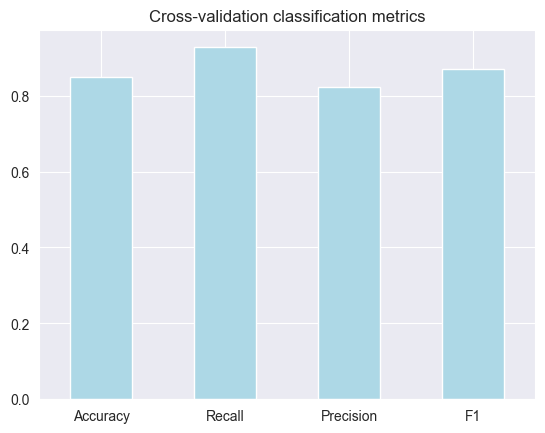

In [50]:
# visualize cross-validation metrics
cv_metrics = pd.DataFrame({'Accuracy': accurcy_cv, 'Recall': recall_cv,
                           'Precision': precision_cv, 'F1': f1_cv},
                         index=[0])
cv_metrics.T.plot.bar(title='Cross-validation classification metrics',
                      legend=False, color=['lightblue'])
plt.xticks(rotation=0);

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [51]:
# fit an instance of LogesticRegression
clf = LogisticRegression(C=0.2196707090793235, solver='liblinear')

clf.fit(x_train, y_train)

LogisticRegression(C=0.2196707090793235, solver='liblinear')

In [52]:
# check coef_
clf.coef_

array([[ 0.00346682, -0.88318561,  0.66914558, -0.01159755, -0.00168188,
         0.04582827,  0.32553233,  0.02465652, -0.61834862, -0.57298305,
         0.4617902 , -0.64510241, -0.68973408]])

In [53]:
# match the coef's of feature columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0034668193319573296,
 'sex': -0.8831856056895386,
 'cp': 0.6691455783798691,
 'trestbps': -0.01159754825265025,
 'chol': -0.0016818826415392271,
 'fbs': 0.04582827399790867,
 'restecg': 0.32553233477065546,
 'thalach': 0.024656524993082345,
 'exang': -0.6183486189023589,
 'oldpeak': -0.5729830487168865,
 'slope': 0.4617901994478175,
 'ca': -0.6451024086078487,
 'thal': -0.6897340800970612}

/tmp/ipykernel_889942/232858279.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


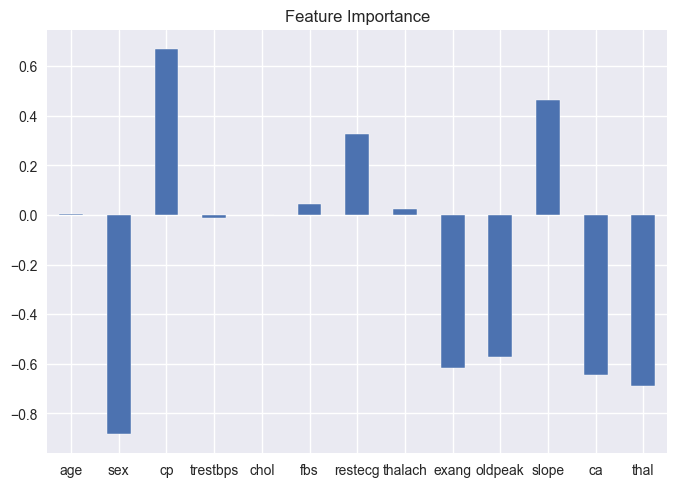

In [54]:
# visualize feature importance
plt.style.use('seaborn')
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)
plt.xticks(rotation=0);

In [55]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [56]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
